In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target


In [6]:
np.shape(y)

(150,)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print(model.score(xtest,ytest)) #returns the accuracy
print(classification_report(ytest,y_pred))

0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      0.83      0.87        12
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



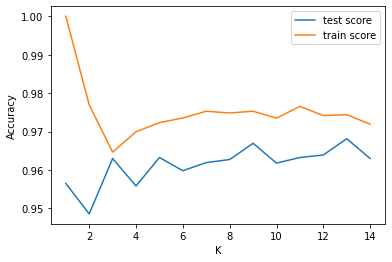

In [20]:
test_score=[]
train_score=[]

for K in np.arange(1,15):
    testTemp=[]
    trainTemp=[]
    for j in np.arange(1,200):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
        model=KNeighborsClassifier(n_neighbors=K)
        model.fit(xtrain,ytrain)
        testTemp.append(model.score(xtest,ytest))
        trainTemp.append(model.score(xtrain,ytrain))
        
        
    test_score.append(np.mean(testTemp))
    train_score.append(np.mean(trainTemp)) #to see if it is underfitting 
    
    
plt.plot(np.arange(1,15),test_score,label="test score")
plt.plot(np.arange(1,15),train_score,label="train score")
plt.xlabel("K")
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Which K is the best?
#we usually can't afford to do a 200 run

### Non-linear patterns

- Unlike basic logisitic regression, KNN can create non-linear decision boundries.

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



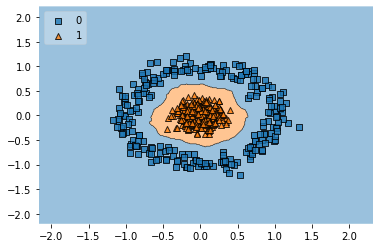

In [21]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

x,y=make_circles(n_samples=500,noise=.1,factor=.2)


model=KNeighborsClassifier(n_neighbors=3)
model.fit(x,y)
ypred=model.predict(x)


plot_decision_regions(x,y,clf=model,legend=2);


print(model.score(x,y))
print(classification_report(y,ypred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



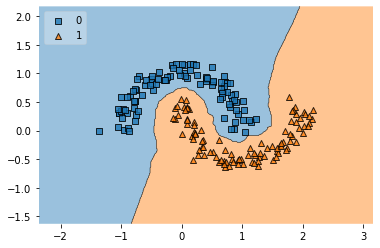

In [22]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons

x,y=make_moons(n_samples=200,shuffle=True, noise=.1)


model=KNeighborsClassifier(n_neighbors=3)
model.fit(x,y)
ypred=model.predict(x)


plot_decision_regions(x,y,clf=model,legend=2);

print(model.score(x,y))
print(classification_report(y,ypred))